In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

In [ ]:
dados = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

dados.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.3


In [ ]:
def tranforma_branch(valor):
  if valor == 'A':
    return 1
  elif valor == 'B':
    return 2
  else:
    return 3

def transforma_city(valor):
  if valor == 'Yangon':
    return 1
  elif valor == 'Naypyitaw':
    return 2
  else:
    return 3

def transforma_customer(valor):
  if valor == 'Normal':
    return 0
  else:
    return 1

def transforma_gender(valor):
  if valor == 'Female':
    return 0
  else:
    return 1

def transforma_pay(valor):
  if valor == 'Credit card':
    return 1
  elif valor == 'Ewallet':
    return 2
  else:
    return 3


In [ ]:
dados['Branch_Value'] = dados['Branch'].map(tranforma_branch)
dados['City_Value'] = dados['City'].map(transforma_city)
dados['Customer_Value'] = dados['Customer type'].map(transforma_customer)
dados['Gender_Value'] = dados['Gender'].map(transforma_gender)
dados['Payment_Value'] = dados['Payment'].map(transforma_pay)

In [ ]:
dados.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Branch_Value,City_Value,Customer_Value,Gender_Value,Payment_Value
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.1,1,1,1,0,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.6,3,2,0,0,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.4,1,1,0,1,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.4,1,1,1,1,2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.3,1,1,0,1,2


In [ ]:
print("\nDimensões:\n{0}\n".format(dados.shape))
print("\nCampos:\n{0}\n".format(list(dados.keys())))
print("\nTipos dos dados:\n{0}\n".format(dados.dtypes))


Dimensões:
(1000, 22)


Campos:
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Branch_Value', 'City_Value', 'Customer_Value', 'Gender_Value', 'Payment_Value']


Tipos dos dados:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Branch_Value                 int64
City_Value                  

In [ ]:
dados.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Branch_Value,City_Value,Customer_Value,Gender_Value,Payment_Value
count,1000.00,1000.00,1000.00,1000.00,1000.00,1.00e+03,1000.00,1000.00,1000.00,1000.00,1000.0,1000.0,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76e+00,15.38,6.97,1.99,1.99,0.5,0.5,2.03
std,26.49,2.92,11.71,245.89,234.18,6.22e-14,11.71,1.72,0.82,0.82,0.5,0.5,0.81
min,10.08,1.00,0.51,10.68,10.17,4.76e+00,0.51,4.00,1.00,1.00,0.0,0.0,1.00
25%,32.88,3.00,5.92,124.42,118.50,4.76e+00,5.92,5.50,1.00,1.00,0.0,0.0,1.00
50%,55.23,5.00,12.09,253.85,241.76,4.76e+00,12.09,7.00,2.00,2.00,1.0,0.0,2.00
75%,77.94,8.00,22.45,471.35,448.91,4.76e+00,22.45,8.50,3.00,3.00,1.0,1.0,3.00
max,99.96,10.00,49.65,1042.65,993.00,4.76e+00,49.65,10.00,3.00,3.00,1.0,1.0,3.00


In [ ]:
dados['Total'].groupby(dados['City']).sum()

City
Mandalay     106197.67
Naypyitaw    110568.71
Yangon       106200.37
Name: Total, dtype: float64

In [ ]:
dados['Total'].groupby(dados['Customer type']).sum()

Customer type
Member    164223.44
Normal    158743.31
Name: Total, dtype: float64

In [ ]:
dados['Total'].groupby(dados['Date']).sum()

Date
1/1/2019     4745.18
1/10/2019    3560.95
1/11/2019    2114.96
1/12/2019    5184.76
1/13/2019    2451.20
1/14/2019    3966.62
1/15/2019    5944.26
1/16/2019    4289.08
1/17/2019    3142.76
1/18/2019    2780.47
1/19/2019    4914.72
1/2/2019     1945.50
1/20/2019    3655.45
1/21/2019    2392.10
1/22/2019    1704.77
1/23/2019    5994.19
1/24/2019    5402.05
1/25/2019    4700.37
1/26/2019    4457.51
1/27/2019    4635.90
1/28/2019    4999.71
1/29/2019    3516.57
1/3/2019     2078.13
1/30/2019    2558.26
1/31/2019    5232.50
1/4/2019     1623.69
1/5/2019     3536.68
1/6/2019     3614.20
1/7/2019     2834.24
1/8/2019     5293.73
1/9/2019     3021.34
2/1/2019     2444.54
2/10/2019    3141.02
2/11/2019    4542.15
2/12/2019    2998.99
2/13/2019     934.24
2/14/2019    2454.09
2/15/2019    6830.79
2/16/2019    2503.77
2/17/2019    5299.57
2/18/2019    1496.03
2/19/2019    4228.12
2/2/2019     4140.95
2/20/2019    2706.42
2/21/2019    1393.74
2/22/2019    2442.31
2/23/2019    2339.59
2/24/201

In [ ]:
dados['Total'].groupby(dados['Branch']).sum()

Branch
A    106200.37
B    106197.67
C    110568.71
Name: Total, dtype: float64

In [ ]:
dados['Total'].groupby(dados['Payment']).sum()

Payment
Cash           112206.57
Credit card    100767.07
Ewallet        109993.11
Name: Total, dtype: float64

In [ ]:
dados['Invoice ID'].groupby(dados['Product line']).count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Invoice ID, dtype: int64

In [ ]:
dados['Invoice ID'].groupby(dados['Gender']).count()

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

In [ ]:
#variaveis = ['Branch_Value','City_Value','Customer_Value','Gender_Value','Payment_Value','Rating']
#variaveis = ['Branch_Value','City_Value','Gender_Value','Payment_Value','Rating']
#variaveis = ['Branch_Value','City_Value','Customer_Value','Payment_Value']
variaveis = ['City_Value','Customer_Value','Gender_Value','Payment_Value','Rating']
x = dados[variaveis]
y = dados['Quantity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state =0)

In [ ]:
print('X_train: {0}\n'.format(x_train.shape))
print('X_test: {0}\n'.format(x_test.shape))
print('y_train: {0}\n'.format(y_train.shape))
print('y_test: {0}\n'.format(y_test.shape))

X_train: (500, 5)

X_test: (500, 5)

y_train: (500,)

y_test: (500,)



In [ ]:
modelo_gb = GaussianNB()

In [ ]:
modelo_gb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_prec_gb = modelo_gb.predict(x_test)

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)

In [ ]:
modelo_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_prec_rf = modelo_rf.predict(x_test)

In [ ]:
modelo_dt = DecisionTreeClassifier()

In [ ]:
modelo_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_prec_dt = modelo_dt.predict(x_test)

In [ ]:
print('Acuracia GB:',accuracy_score(y_test, y_prec_gb) * 100)
print('Acuracia RF:',accuracy_score(y_test, y_prec_rf) * 100)
print('Acuracia DT:',accuracy_score(y_test, y_prec_dt) * 100)

Acuracia GB: 13.200000000000001
Acuracia RF: 12.2
Acuracia DT: 12.6


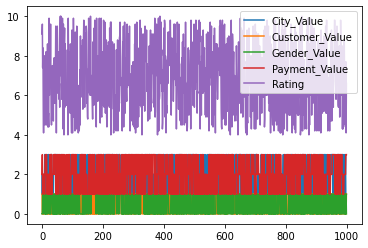

In [ ]:
dados[variaveis].plot()